## DTSC 2301 Spring 2025 Homework #2

Turn in your assignment via Gradescope

Due 1/24/25, 11:59pm

For this assignment you may *not* use any generative AI and you may only use python commands and code we used in class.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv('Ironman1819.csv')
df.head()

,Bib,Name,Country,Gender,Division,Division.Rank,Overall.Time,Overall.Rank,Swim.Time,Swim.Rank,Bike.Time,Bike.Rank,Run.Time,Run.Rank,Finish.Status,Location,Year
0,1,Heather Jackson,United States,Female,FPRO,1,558.816667,2,60.966667,86,304.733333,15,188.483333,5,Finisher,LakePlacid,2018
1,7,Jen Annett,Canada,Female,FPRO,2,573.800000,4,62.966667,128,304.983333,16,200.766667,26,Finisher,LakePlacid,2018
2,2,Sarah Piampiano,United States,Female,FPRO,3,583.400000,8,64.666667,178,325.383333,40,187.516667,3,Finisher,LakePlacid,2018
3,3,Jodie Robertson,United States,Female,FPRO,4,589.933333,15,62.333333,113,314.950000,22,203.816667,36,Finisher,LakePlacid,2018
4,15,Lenny Ramsey,Netherlands,Female,FPRO,5,597.883333,23,66.450000,250,335.400000,74,189.266667,8,Finisher,LakePlacid,2018


#### Question 1
In the file `https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/Ironman1819.csv', there is data on female finishers of the 2018 and 2019 Ironman Triathlon in Lake Placid, NY.  We will focus on the times to complete the three elements of the triathlon, swimming (Swim.Time), biking (Bike.Time) and running (Run.Time).  The units for each of these features is minutes.  The overall time (including transitions from on element to the next) is found in *Overall.Time*. Create a scatterplot for *Swim.Time* as a predictor for *Run.Time*.  As a note it is generally not a good idea in python to make feature/variables have a '.' in them.

More on these data as well as a video introduction to them can be found at: https://isle.stat.cmu.edu/SCORE/ironman_triathlon/

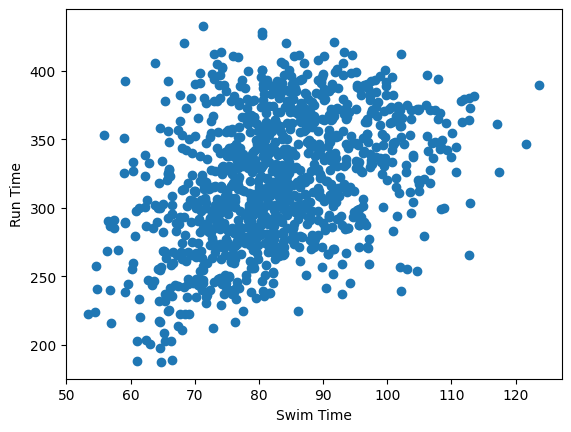

In [3]:

plt.scatter(df['Swim.Time'],df['Run.Time'])
plt.xlabel('Swim Time')
plt.ylabel('Run Time')
plt.show()

#### Question 2
Using the Ironman data from above, fit a regression model that predicts *Overall.Time* from *Bike.Time* and add that line to a scatterplot of those two variables.  Interpret the slope and the y-intercept for these data in the context of these data.  

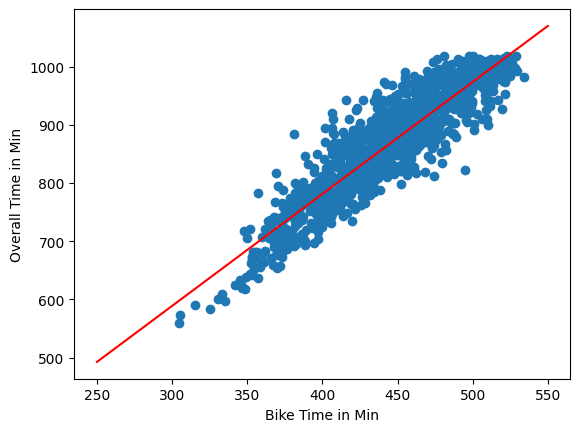

In [12]:
beta0,beta1 = np.polyfit(df['Bike.Time'],df['Overall.Time'],deg=1)
xseq = np.linspace(250,550,num=100)



plt.scatter(df['Bike.Time'],df['Overall.Time'])
plt.xlabel('Bike Time in Min')
plt.ylabel('Overall Time in Min')
plt.plot(xseq,beta1+beta0*xseq,color='red')

#### Question 3
Open the first day survey data, make a new variable that is 1 if the student has a job, either on-campus or off-campus.  Call that variable *job*.  Then make a side by side boxplot of *job* vs *NumbContacts*.  Comment on whether or not there seems to be a relationship between having a job and the number of contacts in their cell phone among DTSC 2301 students.

<Axes: xlabel='job', ylabel='NumbContacts'>

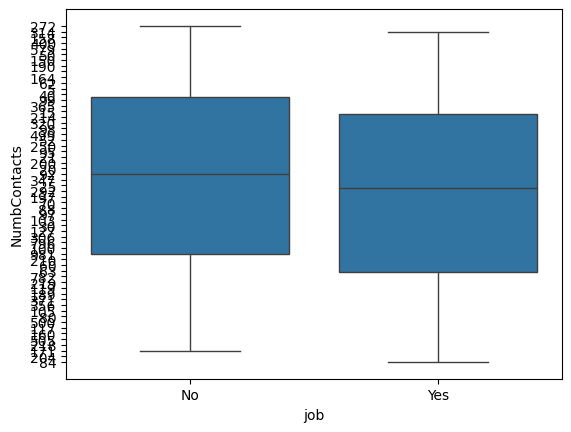

: 

In [ ]:
firstday = pd.read_csv('DTSC2301FirstDaySurvey_Responses_Clean.csv')
firstday['job'] = ((firstday['CampusJob'] == 'Yes') | (firstday['OffCampusJob'] == 'Yes')).map({True:'Yes', False:'No'})



sns.boxplot(x=firstday['job'],y=firstday['NumbContacts'])



#### Question 4
For this question, make a ribbon plot with *job* (from the previous question) on the x-axis and *NCHome* (whether or not a student is from North Carolina) on the y-axis.  Make the plot with those axes reversed.  Explain which plot  you prefer and why?  Which feature/variable do you think should be the target variable here and why?

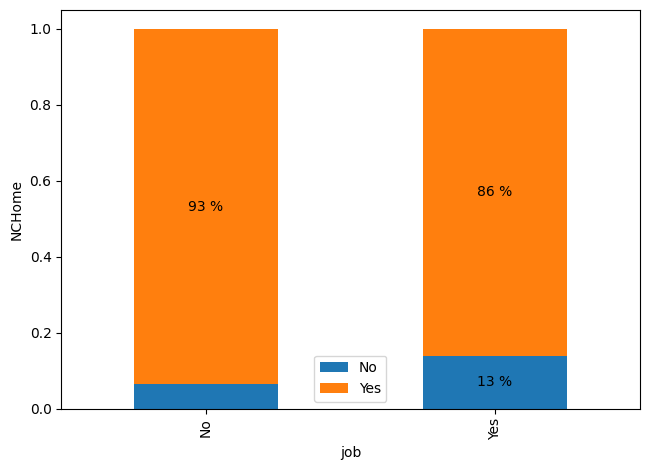

In [77]:
df=firstday
x_var, y_var = "job","NCHome"

df_grouped = df.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)
df_grouped.plot.bar(stacked=True)
plt.legend(loc="best")
for ix, row in df_grouped.reset_index(drop=True).iterrows():
        cumulative = 0
        for element in row:
            if element == element and element > 0.1:
                plt.text(
                    ix,
                    cumulative + element / 2,
                    f"{int(element * 100)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
plt.tight_layout()
plt.ylabel(y_var)
plt.show()

#### Question 5

A data scientist developing a hiring model for sales agents discovers a correlation between having a job on-campus or off-campus and the number of contacts in the candidate's cellular phone. Should the algorithm use this relationship to select candidates for job interviews? Write a 80 - 120 word paragraph with your answer to this question. Consider the implications of the ethical fairness and bias principle of including this data in your model.



Yes, the data obtained from the model is presumed to be cleaned and the model created well and if the metric the hiring team is looking at is number of contacts which makes sense from sales job point of view since its a social job and requires talking with people, seeing a correlation between the two can help weed out candiadtes which dont fit what they are searching for. Ethically as long as the model ius trained on fair features then the data is good and should be used.